In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

# Regression Random Forest
## Decision trees (recall) 
The classification decision tree receives as inputs:
  + $X$: a set of point or objects, described in a given space (set of features: usually $\in \mathbb{R}$). 
  + $y$: the set of class-memberships of each object $\in X$ (discrete).
    
For instance in the `iris` dataset, each flower was described through the length and the width of its sepal and petal (4D space), and the corresponding classes were simply the flower species (Iris setosa, Iris virginica and Iris versicolor).

Then the goal of the decision tree is to create splits in order to separate the different objects from dataset according to their class membership. 
The path between the root and the leaf of a decision tree denotes a decision rule that allows to assign a data point to a given class.

At each iteration, a new split is chosen in order to maximize an entropy or gini criteria (purity criteria).

## Ensemble methods

In the machine learning field, ensemble methods aim at using multiple learners (algorithms), to tackle independently a given task (e.g., classification, clustering, regression), and then using their respective outputs to take a decision (e.g. voting).
The Ensemble learning algorithm tends to obtain better performances than any of its simple constituents.
Moreover, it has been observed empirically that ensembles with diverse constituting models lead to better results.
This principle is sometimes known as the __wisdom of crowds__: an ensemble of "weak" learners is more powerful than each learner individually.
Intuitively, taking a group of independent weak learner correct the weak learners possible overfittings, increasing the overall quality.


## Random Forests (very short description)

Random decision forests (or simply random forests) are a decision tree-based ensemble learning technique.

A random forest grows a set of classification or regression decision trees, feeding them with different subsets of data points in possibly different subspaces, and then the random forest outputs:

- The most voted class, in the context of classification.
- The average prediction of the individual trees, in the context of regression.

__Parameters__ :
+ The main parameters of each tree:
    + max depth
    + min number of samples within a split node
    + min number of samples within a leaf
    + max number of leafs
+ The Random Forest parameters:
    + max number of features to consider in order to apply a split (usually the sqrt of the dataset dimensionality)
    + Train each tree in a different bootstrap (subset of data points)
    + Use a warm start (if the algorithm is run again, the old trees are not erased, but new trees are created instead)
    + The number of independent trees (large number of trees $\to$ better the results but higher requirements in terms of  more computational resources)

__note__: In the Sci-kit learn documentation we can read: "The features are always randomly permuted at each split. Therefore, the best found split may vary, even with the same training data, max_features=n_features and bootstrap=False"

# Build the training dataset
+ Generate a random input dataset $X$ with $size$ points $X_i \in [low, high]$.

In [3]:
size = 200
low = 0
high = 10
X = np.sort(np.random.uniform(low=low, high=high, size=size))

+ Generate the prediction target (output), by applying a noisy sine function to $X$

In [4]:
min_noise = -0.5
max_noise = 0.5
y = np.sin(X) + np.random.uniform(low=min_noise, high=max_noise, size=size)

+ Plot y=f(X)

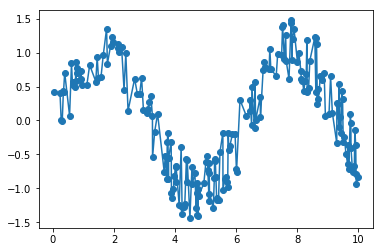

In [5]:
plt.plot(X,y,"o-")

# Create a regression  random forest 
+ Import the Random Forest Regressor class

In [6]:
from sklearn.ensemble import RandomForestRegressor

+ Build a regressor with `n_estimators=5` and `n_estimators=100`

In [7]:
rfr5 = RandomForestRegressor(n_estimators=5,
                            criterion='mse',
                            max_depth=4,
                            min_samples_split=2,
                            min_samples_leaf=1,
                            max_features='sqrt',# In this case nothing changes because we have only 1 feature
                            max_leaf_nodes=None,
                            bootstrap=True,
                            warm_start=False)

+ Train the random forest

In [8]:
rfr5 = rfr5.fit(X.reshape(-1, 1), y)

+ Compute the regression of the random forest, as well as each inner tree

In [9]:
y_rf5 = rfr5.predict(X.reshape(-1, 1))
y_trees = []
for tree in rfr5.estimators_:
    y_trees.append(tree.predict(X.reshape(-1, 1)))

+ Plot the output of the random forest, as well as the results of each inner tree

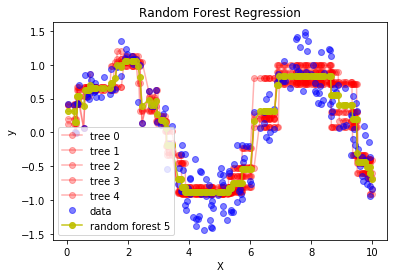

In [10]:
for i,y_tree in enumerate(y_trees):
    plt.plot(X, y_tree, "ro-", label="tree "+str(i), alpha=0.3)
plt.plot(X, y, "bo", label="data",alpha=0.5)
plt.plot(X, y_rf5, "yo-", label="random forest 5",alpha=0.9)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Random Forest Regression")
_=plt.legend()

# Selecting features using a regression random forest 
Steps:
+ Load the iris dataset
+ Use a Regression random forest to predict the last column of the dataset, using the 3 first columns.
+ Compute the importance of each input column regarding the regression of the last one

In [11]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:, :3]  # the input will be the first 3 columns
y = iris.data[:,3] # the target variable will be the last column

+   Create a random forest regressor with 100 trees

In [12]:
rfr = RandomForestRegressor(n_estimators=100,
                            criterion='mse',
                            max_depth=3,
                            min_samples_split=2,
                            min_samples_leaf=1,
                            max_features='sqrt',# In this case nothing changes because we have only 1 feature
                            max_leaf_nodes=None,
                            bootstrap=True,
                            warm_start=False)

+ Fit the regressor

In [13]:
rfr = rfr.fit(X,y)

+ Compute the regression

In [14]:
y_rfr = rfr.predict(X)

+ Plot the prediction vs. the real values

Text(0, 0.5, 'Predicted value')

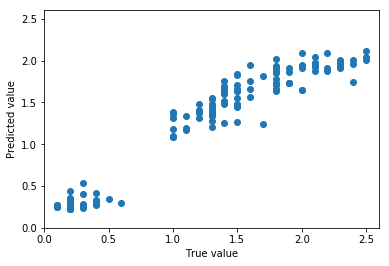

In [15]:
plt.plot(y,y_rfr,"o")
plt.xlim([0,2.6])
plt.ylim([0,2.6])
plt.xlabel("True value")
plt.ylabel("Predicted value")

+ Get the importance of each one of the first 3 columns (features) regarding the prediction of the fourth

Text(0, 0.5, 'importance (between 0 and 1)')

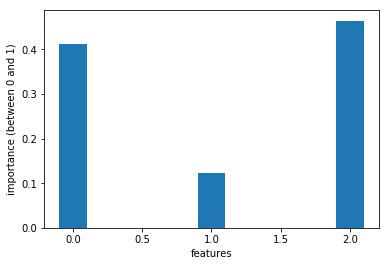

In [16]:
importance = rfr.feature_importances_
plt.bar(range(len(importance)), importance,0.2)
plt.xlabel("features")
plt.ylabel("importance (between 0 and 1)")

Features 0 and 2 are more important than feature 1 regarding the regression task